# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.



### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



## Importación del Dataset con Pandas 

Importamos pandas y le asignamos el alias pd
* `import pandas as pd`
 
 Se lee el archivo CSV llamado 'datasets_calificaciones.csv' y lo carga en un DataFrame llamado df


In [73]:
import pandas as pd
df = pd.read_csv('./datasets_calificaciones.csv')

## Exploración Inicial de los Datos

Una vez creado el df, podemos utilizar metodos de pandas que nos ayudaran a observar mejor los datos.
* df.head()           # Primeras 5 filas
* df.info()           # Info general: tipos de datos, nulos, etc.

In [74]:
df.head()


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


Se muestra un resumen estadístico del DataFrame incluyendo todas las columnas (numéricas y no numéricas)

In [76]:
df.describe(include='all')
print(df.describe)



<bound method NDFrame.describe of          estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0         ana pérez  matematicas         8       7.5     9        95%
1      carlos lópez       fisica       6.2         7   NaN        88%
2       maría gómez      quimica         9       8.8   9.5       100%
3   pedro rodríguez     historia       7.5         6     7         75
4      laura vargas  matematicas                 9.2   8.5        92%
..              ...          ...       ...       ...   ...        ...
95  josefina torres     historia       7.4       6.8   7.2        81%
96  bautista vargas  matematicas       8.7       NaN   8.5        92%
97        emma soto       fisica       6.6       7.0   6.4        83%
98       mateo díaz      quimica       9.5       9.7              98%
99  sofía fernández     historia       7.1       7.6   7.5        87%

[100 rows x 6 columns]>


## Limpieza y normalizacion de datos 

Se convierte la columna 'Asistencia' a valores numéricos. Si hay errores (valores no convertibles), los reemplaza con NaN.

Con el método pd.to_numeric  convierte todos los valores de esa columna a números (enteros o decimales).

Se muestra los primeros 5 valores de la columna 'Asistencia' del DataFrame

In [77]:
df['Asistencia'] = pd.to_numeric(df['Asistencia'], errors='coerce')
df['Asistencia'].head()

0     NaN
1     NaN
2     NaN
3    75.0
4     NaN
Name: Asistencia, dtype: float64

Se reemplaza los valores NaN en la columna 'Asistencia' con el promedio de esa misma columna

In [78]:
df['Asistencia'] = df['Asistencia'].fillna(df['Asistencia'].mean())
print(df['Asistencia'])


0     75.0
1     75.0
2     75.0
3     75.0
4     75.0
      ... 
95    75.0
96    75.0
97    75.0
98    75.0
99    75.0
Name: Asistencia, Length: 100, dtype: float64


In [79]:
df.head()


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,75.0
1,carlos lópez,fisica,6.2,7,NaN,75.0
2,maría gómez,quimica,9,8.8,9.5,75.0
3,pedro rodríguez,historia,7.5,6,7,75.0
4,laura vargas,matematicas,,9.2,8.5,75.0


Lista con los nombres de las columnas que se desea convertir a valores numéricos

Para cada columna en la lista, convierte sus valores a tipo numérico

Si hay errores en la conversión, los reemplaza con NaN

In [80]:
cols_numericas = ['Parcial 1', 'Parcial 2', 'Final']

df[cols_numericas] = df[cols_numericas].apply(lambda col: pd.to_numeric(col, errors='coerce'))


In [81]:
print(df[cols_numericas])


    Parcial 1  Parcial 2  Final
0         8.0        7.5    9.0
1         6.2        7.0    NaN
2         9.0        8.8    9.5
3         7.5        6.0    7.0
4         NaN        9.2    8.5
..        ...        ...    ...
95        7.4        6.8    7.2
96        8.7        NaN    8.5
97        6.6        7.0    6.4
98        9.5        9.7    NaN
99        7.1        7.6    7.5

[100 rows x 3 columns]


Reemplazamos los NaN de cada columna en la lista por la media de esa columna usando apply

In [82]:
df[cols_numericas] = df[cols_numericas].apply(lambda col: col.fillna(col.mean()))


Imprimimos la cantidad de valores NaN (faltantes) que hay en cada columna listada en 'cols_numericas'

In [83]:
print(df[cols_numericas].isna().sum())


Parcial 1    0
Parcial 2    0
Final        0
dtype: int64


Reemplazamos los ceros (0) en las columnas numéricas y 'Asistencia' con la mediana de cada columna

In [84]:
columnas = cols_numericas + ['Asistencia']
df[columnas] = df[columnas].apply(lambda col: col.replace(0, col.median()))



In [85]:
print(df)


         estudiante      Materia  Parcial 1  Parcial 2     Final  Asistencia
0         ana pérez  matematicas   8.000000   7.500000  9.000000        75.0
1      carlos lópez       fisica   6.200000   7.000000  7.894118        75.0
2       maría gómez      quimica   9.000000   8.800000  9.500000        75.0
3   pedro rodríguez     historia   7.500000   6.000000  7.000000        75.0
4      laura vargas  matematicas   7.831818   9.200000  8.500000        75.0
..              ...          ...        ...        ...       ...         ...
95  josefina torres     historia   7.400000   6.800000  7.200000        75.0
96  bautista vargas  matematicas   8.700000   7.830682  8.500000        75.0
97        emma soto       fisica   6.600000   7.000000  6.400000        75.0
98       mateo díaz      quimica   9.500000   9.700000  7.894118        75.0
99  sofía fernández     historia   7.100000   7.600000  7.500000        75.0

[100 rows x 6 columns]


In [86]:
df["Asistencia"] = df["Asistencia"].replace("%","", regex=True)

In [87]:
print(df["Asistencia"])


0     75.0
1     75.0
2     75.0
3     75.0
4     75.0
      ... 
95    75.0
96    75.0
97    75.0
98    75.0
99    75.0
Name: Asistencia, Length: 100, dtype: float64


Normalizamos el formato de las columnas estudiante y Materia

Convertimos todos los valores de la columna 'Materia' a minúsculas y elimina los espacios en blanco al principio y al final

Convertimos los valores de la columna 'estudiante' a formato título (primer letra en mayúscula) y elimina los espacios en blanco al principio y al final

In [88]:

df['Materia'] = df['Materia'].str.lower().str.strip()
df['estudiante'] = df['estudiante'].str.title().str.strip()

In [89]:
print(df['estudiante'])

0           Ana Pérez
1        Carlos López
2         María Gómez
3     Pedro Rodríguez
4        Laura Vargas
           ...       
95    Josefina Torres
96    Bautista Vargas
97          Emma Soto
98         Mateo Díaz
99    Sofía Fernández
Name: estudiante, Length: 100, dtype: object


Se convierte todos los valores de la columna 'Materia' a formato título (primera letra de cada palabra en mayúscula)

In [90]:
df['Materia'] = df['Materia'].str.title()

In [91]:
print(df['Materia'])

0     Matematicas
1          Fisica
2         Quimica
3        Historia
4     Matematicas
         ...     
95       Historia
96    Matematicas
97         Fisica
98        Quimica
99       Historia
Name: Materia, Length: 100, dtype: object


Se selecciona las columnas 'Parcial 1', 'Parcial 2', 'Final', 'Asistencia' y se elimina las filas que contienen valores NaN

In [92]:
df_filtrado = df[['Parcial 1', 'Parcial 2', 'Final', 'Asistencia']].dropna()

## Obtención de Estadísticas Descriptivas 

Se genera un resumen estadístico de las columnas numéricas del DataFrame

In [93]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.000000,100.000000,100.000000,100.0
mean,7.831818,7.830682,7.894118,75.0
std,1.134184,1.108950,1.111133,0.0
min,5.500000,5.800000,5.700000,75.0
25%,7.075000,6.975000,7.100000,75.0
50%,7.831818,7.830682,7.894118,75.0
75%,8.800000,8.800000,8.825000,75.0
max,9.900000,9.900000,9.900000,75.0


Calculamos el promedio de las columnas 'Parcial 1', 'Parcial 2' y 'Final' y guarda los resultados en la lista 'promedios'

In [94]:

promedios = [
    df['Parcial 1'].mean(),
    df['Parcial 2'].mean(),
    df['Final'].mean()
]

print(promedios)

[np.float64(7.831818181818182), np.float64(7.8306818181818185), np.float64(7.894117647058822)]


## Visualización de los Datos con Matplotlib

Importamos matplotlib

In [95]:
import matplotlib.pyplot as plt


Generamos un histograma para las calificaciones de tres parciales ('Parcial 1', 'Parcial 2' y 'Final') usando la librería matplotlib

<Figure size 1000x600 with 0 Axes>

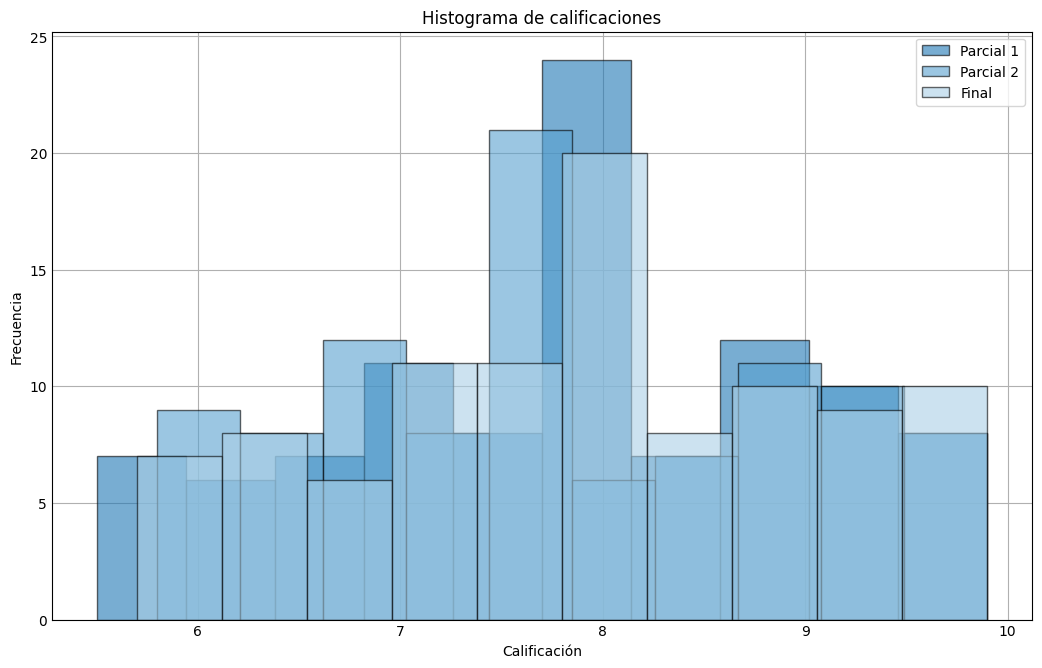

In [96]:
plt.style.use('_mpl-gallery')

plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))
plt.hist(df['Parcial 1'].dropna(), bins=10, alpha=0.6, edgecolor='black', label='Parcial 1')
plt.hist(df['Parcial 2'].dropna(), bins=10, alpha=0.6, edgecolor='black', label='Parcial 2')
plt.hist(df['Final'].dropna(), bins=10, alpha=0.6, edgecolor='black', label='Final')

plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificaciones')
plt.legend()
plt.show()

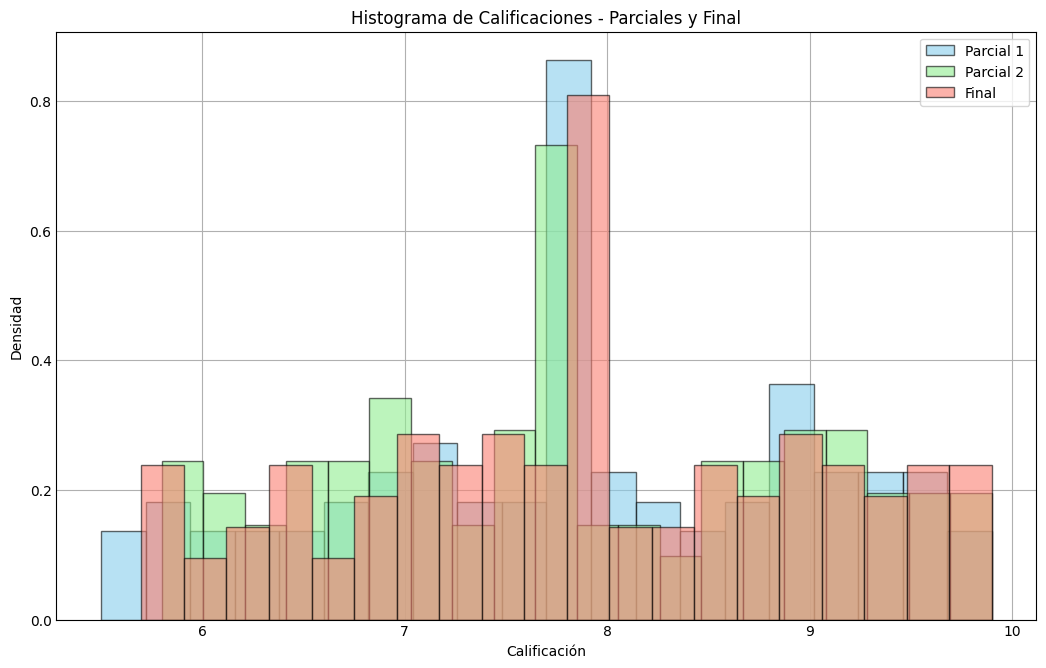

In [97]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')  
plt.figure(figsize=(10,6))                                                                                                               

# Histograma de los tres exámenes
plt.hist(df['Parcial 1'].dropna(), bins=20, alpha=0.6, edgecolor='black', label='Parcial 1', density=True, color='skyblue')
plt.hist(df['Parcial 2'].dropna(), bins=20, alpha=0.6, edgecolor='black', label='Parcial 2', density=True, color='lightgreen')
plt.hist(df['Final'].dropna(),     bins=20, alpha=0.6, edgecolor='black', label='Final',     density=True, color='salmon')

plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Histograma de Calificaciones - Parciales y Final')
plt.legend()
plt.show()


Generamos un gráfico de dispersión que compara las calificaciones de los parciales y final con la asistencia de los estudiantes

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(df_filtrado['Parcial 1'], df_filtrado['Asistencia'], alpha=0.6, color='black', label='Parcial 1')
plt.scatter(df_filtrado['Parcial 2'], df_filtrado['Asistencia'], alpha=0.6, color='red', label='Parcial 2')
plt.scatter(df_filtrado['Final'], df_filtrado['Asistencia'], alpha=0.6, color='blue', label='Final')

plt.xlabel('Calificación')
plt.ylabel('Asistencia (%)')
plt.title('Dispersión: Calificaciones vs Asistencia')
plt.legend()
plt.grid(True)
plt.show()

Generamos un gráfico de barras agrupadas que muestra los promedios de las calificaciones de tres exámenes (Parcial 1, Parcial 2, y Final) para cada materia

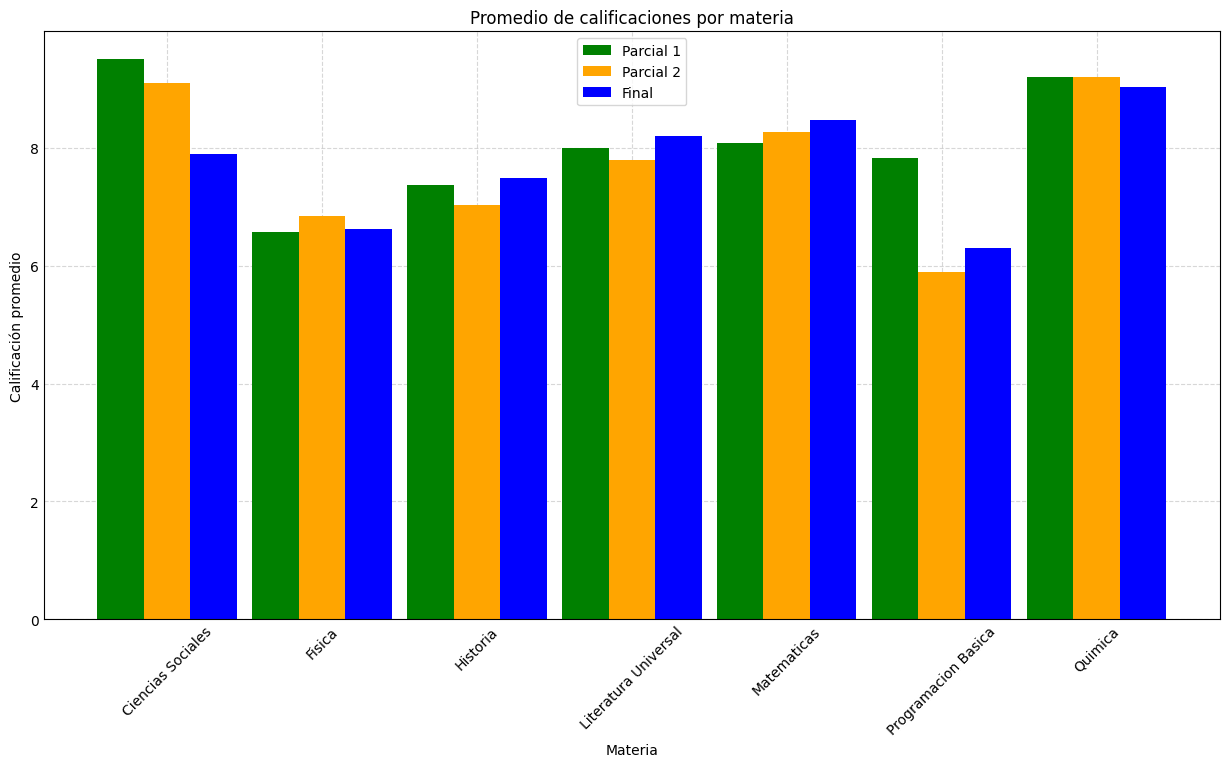

In [99]:
import numpy as np

df_promedios = df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean()

x = np.arange(len(df_promedios))
width = 0.3

plt.figure(figsize=(12,6))
plt.bar(x - width, df_promedios['Parcial 1'], width, label='Parcial 1', color='green')
plt.bar(x, df_promedios['Parcial 2'], width, label='Parcial 2', color='orange')
plt.bar(x + width, df_promedios['Final'], width, label='Final', color='blue')

plt.xlabel('Materia')
plt.ylabel('Calificación promedio')
plt.title('Promedio de calificaciones por materia')
plt.xticks(x, df_promedios.index, rotation=45)  # Nombres de materias en el eje X
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)


plt.show()

## Exportación a Archivo SQLite 

Se crea una conexión a una base de datos SQLite 
Exportar el DataFrame limpio a una tabla llamada "calificaciones"
Cerrar la conexión

In [100]:
import sqlite3


conn = sqlite3.connect("calificaciones.db") 


df.to_sql("calificaciones", conn, if_exists="replace", index=False)


conn.close()

